Epoch 1/5


c:\Program Files\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.5071 - loss: 0.6864 - val_accuracy: 0.4667 - val_loss: 0.6890
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5071 - loss: 0.6860 - val_accuracy: 0.4667 - val_loss: 0.6886
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5071 - loss: 0.6857 - val_accuracy: 0.4667 - val_loss: 0.6883
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5071 - loss: 0.6853 - val_accuracy: 0.4667 - val_loss: 0.6883
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5071 - loss: 0.6848 - val_accuracy: 0.4667 - val_loss: 0.6880
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4786 - loss: 0.6977 - val_accuracy: 0.5500 - val_loss: 0.6920
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.5167 - val_loss: 0.6892
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5286 - loss: 0.6893 - val_accuracy: 0.4667 - val_loss: 0.6878
Epoch 4/5
3/3 ━━━━

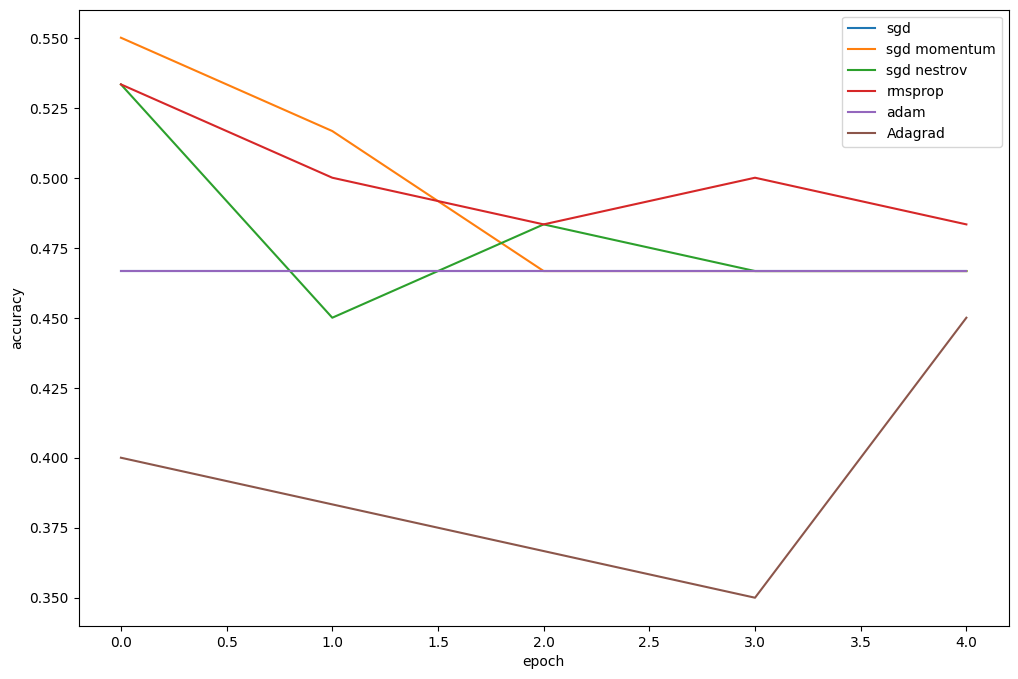

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad
from sklearn.model_selection import train_test_split


X=np.random.rand(200,10).astype('float32')
Y=(np.sum(X,axis=1)>5).astype('float32')

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)


config={
    'sgd':SGD(0.01),
    'sgd momentum':SGD(0.01,momentum=0.9),
    'sgd nestrov':SGD(0.01,momentum=0.9,nesterov=True),
    'rmsprop':RMSprop(0.001),
    'adam':Adam(0.001),
    'Adagrad':Adagrad(0.01)
}


history={}
for name,optim in config.items():
    model=Sequential([
        Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
        Dense(32,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer=optim,loss='binary_crossentropy',metrics=['accuracy'])
    h=model.fit(x_train,y_train,batch_size=64,epochs=5,validation_data=(x_test,y_test))
    history[name]=h.history['val_accuracy']


plt.figure(figsize=(12,8))
for name,log in history.items():
    plt.plot(log,label=name)
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()